几个股票的涨跌——有相关性——线性相关？

In [2]:
import tushare as ts
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [3]:
pro=ts.pro_api()

In [4]:
df_HTYY=pro.daily(ts_code="002758.SZ", start_date="20190715",end_date="20190815")
df_HTYY

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,002758.SZ,20190815,8.51,8.73,8.37,8.67,8.71,-0.04,-0.4592,12550.53,10778.198
1,002758.SZ,20190814,8.79,8.83,8.68,8.71,8.69,0.02,0.2301,6898.75,6026.758
2,002758.SZ,20190813,8.73,8.76,8.66,8.69,8.82,-0.13,-1.4739,9299.77,8092.306
3,002758.SZ,20190812,8.74,8.89,8.69,8.82,8.74,0.08,0.9153,8123.61,7116.566
4,002758.SZ,20190809,8.78,8.85,8.65,8.74,8.73,0.01,0.1145,10461.00,9143.974
5,002758.SZ,20190808,8.64,8.81,8.64,8.73,8.63,0.10,1.1587,8754.50,7640.938
6,002758.SZ,20190807,8.78,8.80,8.63,8.63,8.69,-0.06,-0.6904,9081.50,7914.696
7,002758.SZ,20190806,8.73,8.85,8.60,8.69,8.90,-0.21,-2.3596,20031.66,17433.940
8,002758.SZ,20190805,9.00,9.04,8.87,8.90,8.93,-0.03,-0.3359,10291.50,9208.161
9,002758.SZ,20190802,9.03,9.03,8.80,8.93,9.12,-0.19,-2.0833,11517.25,10321.057


In [5]:
df_HTYY_pct_change=df_HTYY["pct_chg"].values

In [6]:
df_HTYY_pct_change

array([-0.4592,  0.2301, -1.4739,  0.9153,  0.1145,  1.1587, -0.6904,
       -2.3596, -0.3359, -2.0833,  0.885 , -1.2022, -1.0811,  3.6996,
        0.2247,  0.1125,  1.8328,  0.8083, -2.5872,  0.7937, -2.2173,
       -0.3315,  0.1106, -1.6322])

In [7]:
df_DYYY=pro.daily(ts_code="600833.SH", start_date="20190715",end_date="20190815")

In [8]:
df_DYYY_pct_change=df_DYYY["pct_chg"].values

In [9]:
df_DYYY_pct_change

array([ 0.1073,  0.8658, -1.3874,  1.7372, -2.4364,  1.6146, -1.2752,
       -4.7571, -1.002 , -1.0902,  0.    ,  1.3052,  0.8097, -0.9027,
        1.1156, -0.404 ,  1.5385,  0.9317, -2.2267, -0.1011, -1.1   ,
       -0.6951, -0.8858,  0.8937])

In [10]:
X_df_HTYY_pct_change=sm.add_constant(df_HTYY_pct_change)
X_df_HTYY_pct_change

array([[ 1.    , -0.4592],
       [ 1.    ,  0.2301],
       [ 1.    , -1.4739],
       [ 1.    ,  0.9153],
       [ 1.    ,  0.1145],
       [ 1.    ,  1.1587],
       [ 1.    , -0.6904],
       [ 1.    , -2.3596],
       [ 1.    , -0.3359],
       [ 1.    , -2.0833],
       [ 1.    ,  0.885 ],
       [ 1.    , -1.2022],
       [ 1.    , -1.0811],
       [ 1.    ,  3.6996],
       [ 1.    ,  0.2247],
       [ 1.    ,  0.1125],
       [ 1.    ,  1.8328],
       [ 1.    ,  0.8083],
       [ 1.    , -2.5872],
       [ 1.    ,  0.7937],
       [ 1.    , -2.2173],
       [ 1.    , -0.3315],
       [ 1.    ,  0.1106],
       [ 1.    , -1.6322]])

In [11]:
results=sm.OLS(df_DYYY_pct_change,X_df_HTYY_pct_change).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     5.395
Date:                Thu, 22 Aug 2019   Prob (F-statistic):             0.0298
Time:                        00:11:54   Log-Likelihood:                -41.266
No. Observations:                  24   AIC:                             86.53
Df Residuals:                      22   BIC:                             88.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1985      0.292     -0.681      0.5

In [12]:
fitted_ys=results.fittedvalues
fitted_ys

array([-0.41127132, -0.0919402 , -0.88135007,  0.22549151, -0.14549406,
        0.33825112, -0.51837904, -1.29166716, -0.35415028, -1.16366601,
        0.21145447, -0.75547996, -0.69937812,  1.51537056, -0.09444185,
       -0.1464206 ,  0.65054055,  0.17592176, -1.39710711,  0.16915804,
       -1.22574402, -0.3521119 , -0.14730081, -0.9546855 ])

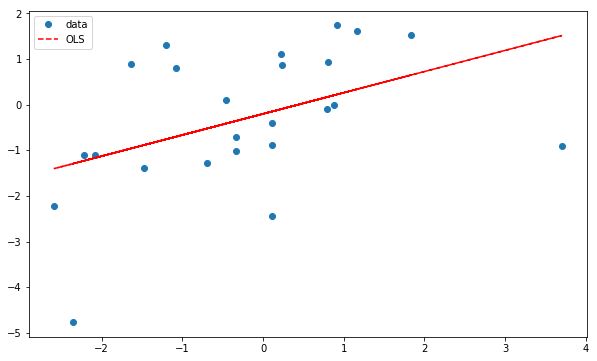

In [16]:
fig, ax=plt.subplots(figsize=(10,6))
ax.plot(df_HTYY_pct_change,df_DYYY_pct_change,"o",label="data")
ax.plot(df_HTYY_pct_change,fitted_ys,"r--",label="OLS")
ax.legend()